In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [29]:
X_train=pd.read_csv(r'C:\Users\C-ROAD\Downloads\Classification Model Sets (1)\Classification Model Sets\ClassificationDataset_train.csv')
x_test=pd.read_csv(r'C:\Users\C-ROAD\Downloads\Classification Model Sets (1)\Classification Model Sets\ClassificationDataset_test.csv')
y_test=pd.read_csv(r'C:\Users\C-ROAD\Downloads\Classification Model Sets (1)\Classification Model Sets\ClassificationLabel_test.csv')
y_train=pd.read_csv(r'C:\Users\C-ROAD\Downloads\Classification Model Sets (1)\Classification Model Sets\ClassificationLabel_train.csv')


In [30]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [31]:
knn_pipeline= Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', IncrementalPCA(n_components=10)),
    ('sampling', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(algorithm='auto',n_neighbors=5,weights='distance'))
])


In [32]:
knn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', IncrementalPCA(n_components=10)),
                ('sampling', SMOTE(random_state=42)),
                ('knn', KNeighborsClassifier(weights='distance'))])

In [6]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [7]:
scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='precision_weighted')

In [18]:
scores

NameError: name 'scores' is not defined

In [9]:
scores.mean()

0.9943119553755396

In [10]:
scores_recall = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='recall_weighted')

In [11]:
scores_recall.mean()

0.9907898615252309

In [12]:
scores_F1 = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='f1_weighted')

In [13]:
scores_F1.mean()

0.9921948504909974

In [14]:
crossVal_predic = cross_val_predict(knn_pipeline,
X_train, y_train, cv=5)

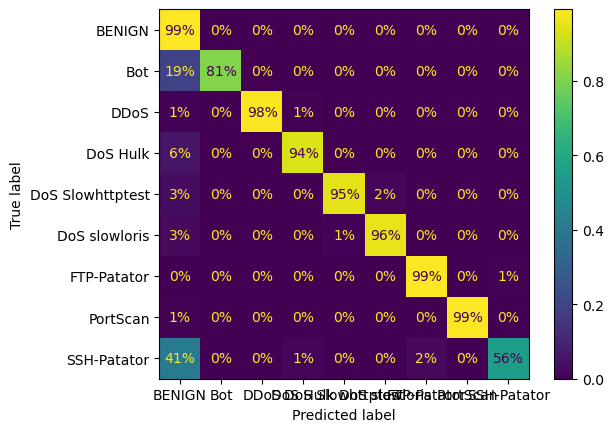

In [15]:
ConfusionMatrixDisplay.from_predictions(y_train,
crossVal_predic,normalize="true", values_format=".0%")
plt.show()

In [16]:
final_score=scores = cross_val_score(knn_pipeline, x_test, y_test, cv=5, scoring='precision_weighted')

In [17]:
scores

array([0.99338487, 0.99342532, 0.99342179, 0.99301833, 0.99316654])

In [19]:
scores.mean()

0.9932833703243158

In [21]:
scores.std()

0.00016340618313704638

In [33]:
crossVal_predic = cross_val_predict(knn_pipeline,
x_test, y_test, cv=5)

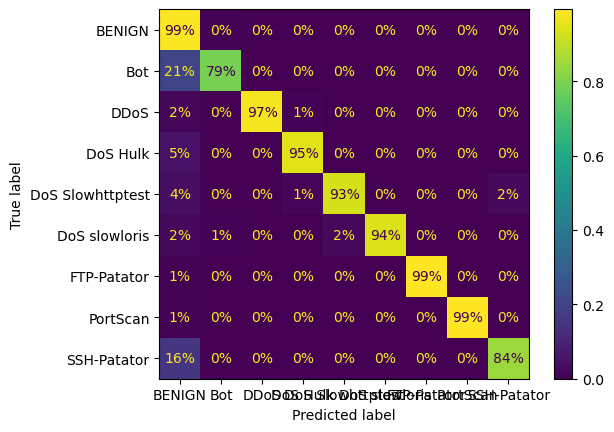

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test,
crossVal_predic,normalize="true", values_format=".0%")
plt.show()